In [ ]:
#Reference = https://www.youtube.com/watch?v=Tjl5jil-V-Y&ab_channel=%28R%29akademi

In [52]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bsoup

# Get Data

In [3]:
get_data = requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents").text
# get_data.status_code
get_data

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by continents - Simple English Wikipedia, the free encyclopedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-c

# Parsing dan Cari Data Yang diinginkan

In [98]:
continent_bsoup = bsoup(get_data, "lxml")
continent = continent_bsoup.find_all('h2'>'span', {'class':'mw-headline'})
continent

[<span class="mw-headline" id="Africa">Africa</span>,
 <span class="mw-headline" id="Antarctica">Antarctica</span>,
 <span class="mw-headline" id="Asia">Asia</span>,
 <span class="mw-headline" id="Europe">Europe</span>,
 <span class="mw-headline" id="North_America">North America</span>,
 <span class="mw-headline" id="South_America">South America</span>,
 <span class="mw-headline" id="Oceania">Oceania</span>,
 <span class="mw-headline" id="References">References</span>,
 <span class="mw-headline" id="Other_websites">Other websites</span>]

In [5]:
unuse_word = ['References', 'Other websites', 'Antarctica']
use_continent = [cont.text for cont in continent if cont.text not in unuse_word]
use_continent

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

In [6]:
country_list = continent_bsoup.find_all('ol')
countrys = [countr.find_all('li') for countr in country_list]
countrys


[[<li><a href="/wiki/Algeria" title="Algeria">Algeria</a> - <a href="/wiki/Algiers" title="Algiers">Algiers</a></li>,
  <li><a href="/wiki/Angola" title="Angola">Angola</a> - <a href="/wiki/Luanda" title="Luanda">Luanda</a></li>,
  <li><a href="/wiki/Benin" title="Benin">Benin</a> - <a class="mw-redirect" href="/wiki/Porto_Novo" title="Porto Novo">Porto Novo</a>, <a href="/wiki/Cotonou" title="Cotonou">Cotonou</a></li>,
  <li><a href="/wiki/Botswana" title="Botswana">Botswana</a> - <a href="/wiki/Gaborone" title="Gaborone">Gaborone</a></li>,
  <li><a href="/wiki/Burkina_Faso" title="Burkina Faso">Burkina Faso</a> - <a href="/wiki/Ouagadougou" title="Ouagadougou">Ouagadougou</a></li>,
  <li><a href="/wiki/Burundi" title="Burundi">Burundi</a> - <a href="/wiki/Gitega" title="Gitega">Gitega</a></li>,
  <li><a href="/wiki/Cameroon" title="Cameroon">Cameroon</a> (also spelled Cameroun) - <a href="/wiki/Yaound%C3%A9" title="Yaoundé">Yaoundé</a></li>,
  <li><a href="/wiki/Cape_Verde" title="Ca

In [101]:
use_country =[]
for get_country in countrys :
#     print(get_country)
    for countr in get_country :
        country_ = [countr.find('a').text for countr in get_country]
        use_country.append(country_)
        break
use_country 

[['Algeria',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina Faso',
  'Burundi',
  'Cameroon',
  'Cape Verde',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Republic of the Congo',
  'Democratic Republic of the Congo',
  "Côte d'Ivoire",
  'Djibouti',
  'Equatorial Guinea',
  'Egypt',
  'Eritrea',
  'Ethiopia',
  'Gabon',
  'The Gambia',
  'Ghana',
  'Guinea',
  'Guinea-Bissau',
  'Kenya',
  'Lesotho',
  'Liberia',
  'Libya',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Niger',
  'Nigeria',
  'Réunion',
  'Rwanda',
  'São Tomé and Príncipe',
  'Senegal',
  'Seychelles',
  'Sierra Leone',
  'Somalia',
  'South Africa',
  'South Sudan',
  'Sudan',
  'Swaziland',
  'Tanzania',
  'Togo',
  'Tunisia',
  'Uganda',
  'Western Sahara',
  'Zambia',
  'Zimbabwe'],
 ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China',
  'East Timor',
  'Georgia',
  '

# Jadikan data menjadi dataframe

In [8]:
pdf = pd.DataFrame(zip(use_continent, use_country), columns=['Benua', 'Negara'])
pdf

,Benua,Negara
0,Africa,"[Algeria, Angola, Benin, Botswana, Burkina Fas..."
1,Asia,"[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba..."
2,Europe,"[Albania, Andorra, Austria, Belarus, Belgium, ..."
3,North America,"[Canada, Mexico, United States of America, Nav..."
4,South America,"[Brazil, Argentina, Bolivia, Chile, Colombia, ..."
5,Oceania,"[Australia, Fiji, New Zealand, Federated State..."


# pecah menjadi 1 negara perbaris

In [9]:
country_df = pdf.explode('Negara').reset_index(drop=True)
country_df

,Benua,Negara
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso
...,...,...
200,Oceania,Samoa
201,Oceania,Solomon Islands
202,Oceania,Tonga
203,Oceania,Tuvalu


In [10]:
country_report = requests.get('https://en.wikipedia.org/wiki/World_Happiness_Report')
country_report.status_code

200

# get data lain

In [14]:
country_report = requests.get('https://en.wikipedia.org/wiki/World_Happiness_Report#2020_report').text
country_soup = bsoup(country_report, 'lxml')
country_find = country_soup.find_all('table', {'class' : 'wikitable'})
country_find

[<table class="wikitable sortable">
 <tbody><tr valign="top">
 <th style="width: 10px;">Overall rank
 </th>
 <th style="width: 250px;">Country or region
 </th></tr>
 <tr>
 <td>1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="1100" data-file-width="1800" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Finland.svg/23px-Flag_of_Finland.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Finland.svg/35px-Flag_of_Finland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Finland.svg/46px-Flag_of_Finland.svg.png 2x" width="23"/> </span><a href="/wiki/Finland" title="Finland">Finland</a>
 </td></tr>
 <tr>
 <td>2</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="387" data-file-width="512" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Denmark.svg/20px-Flag_of_Denmark.svg.png" srcset="//u

In [27]:
report_df = pd.read_html(str(country_find[1]))
report_df

[     Overall rank         Country or region  Score  GDP per capita  \
 0               1                   Finland  7.809           1.285   
 1               2                   Denmark  7.646           1.327   
 2               3               Switzerland  7.560           1.391   
 3               4                   Iceland  7.504           1.327   
 4               5                    Norway  7.488           1.424   
 ..            ...                       ...    ...             ...   
 148           149  Central African Republic  3.476           0.041   
 149           150                    Rwanda  3.312           0.343   
 150           151                  Zimbabwe  3.299           0.426   
 151           152               South Sudan  2.817           0.289   
 152           153               Afghanistan  2.567           0.301   
 
      Social support  Healthy life expectancy  Freedom to make life choices  \
 0             1.500                    0.961                      

# ubah nama kolom

In [28]:
report_df = report_df[0]
report_df = report_df.rename(columns={'Country or region' : 'Negara'})
report_df

,Overall rank,Negara,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434
...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028
149,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486
150,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081
151,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111


# gabungkan dua dataframe dan simpan sebagai csv

In [31]:
merge_df = pd.merge(report_df,country_df, how= 'inner', on='Negara' )
merge_df.to_csv('country_report.csv')
merge_df

,Overall rank,Negara,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Benua
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,Europe
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe
...,...,...,...,...,...,...,...,...,...,...
141,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028,Africa
142,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486,Africa
143,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081,Africa
144,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111,Africa


In [44]:
cr_df = pd.read_csv('./country_report.csv', index_col=2)
cr_df

,Unnamed: 0,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Benua
Negara,,,,,,,,,,
Finland,0,1,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
Denmark,1,2,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
Switzerland,2,3,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
Iceland,3,4,7.504,1.327,1.548,1.001,0.662,0.362,0.145,Europe
Norway,4,5,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe
...,...,...,...,...,...,...,...,...,...,...
Central African Republic,141,149,3.476,0.041,0.000,0.000,0.293,0.254,0.028,Africa
Rwanda,142,150,3.312,0.343,0.523,0.572,0.604,0.236,0.486,Africa
Zimbabwe,143,151,3.299,0.426,1.048,0.375,0.377,0.151,0.081,Africa


# data cleansing

In [48]:
cr_df = cr_df.drop('Unnamed: 0', axis=1)
cr_df

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Benua
Negara,,,,,,,,,
Finland,1,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
Denmark,2,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
Switzerland,3,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
Iceland,4,7.504,1.327,1.548,1.001,0.662,0.362,0.145,Europe
Norway,5,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe
...,...,...,...,...,...,...,...,...,...
Central African Republic,149,3.476,0.041,0.000,0.000,0.293,0.254,0.028,Africa
Rwanda,150,3.312,0.343,0.523,0.572,0.604,0.236,0.486,Africa
Zimbabwe,151,3.299,0.426,1.048,0.375,0.377,0.151,0.081,Africa


# visualisasi data

Text(0, 0.5, 'Happines Score')

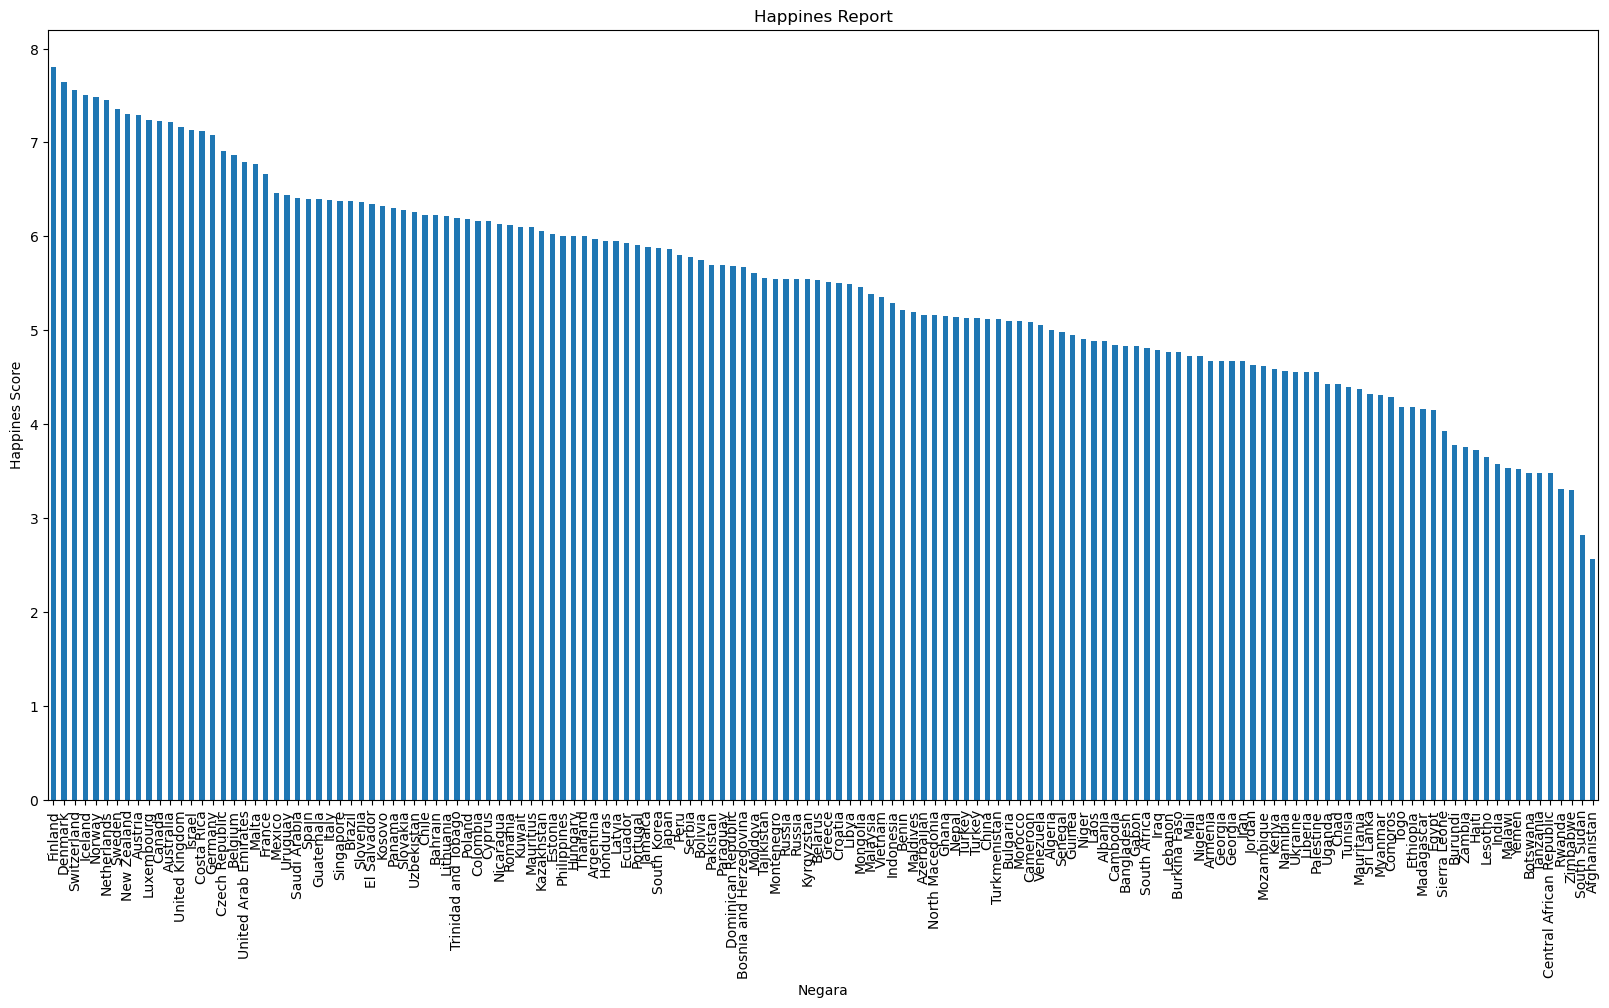

In [49]:
ax = cr_df['Score'].plot(kind='bar', figsize=(20, 10), title='Happines Report')
ax.set_ylabel('Happines Score')

In [50]:
num_feat = cr_df.dtypes[cr_df.dtypes != 'object'].index
num_feat

Index(['Overall rank', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

<AxesSubplot:>

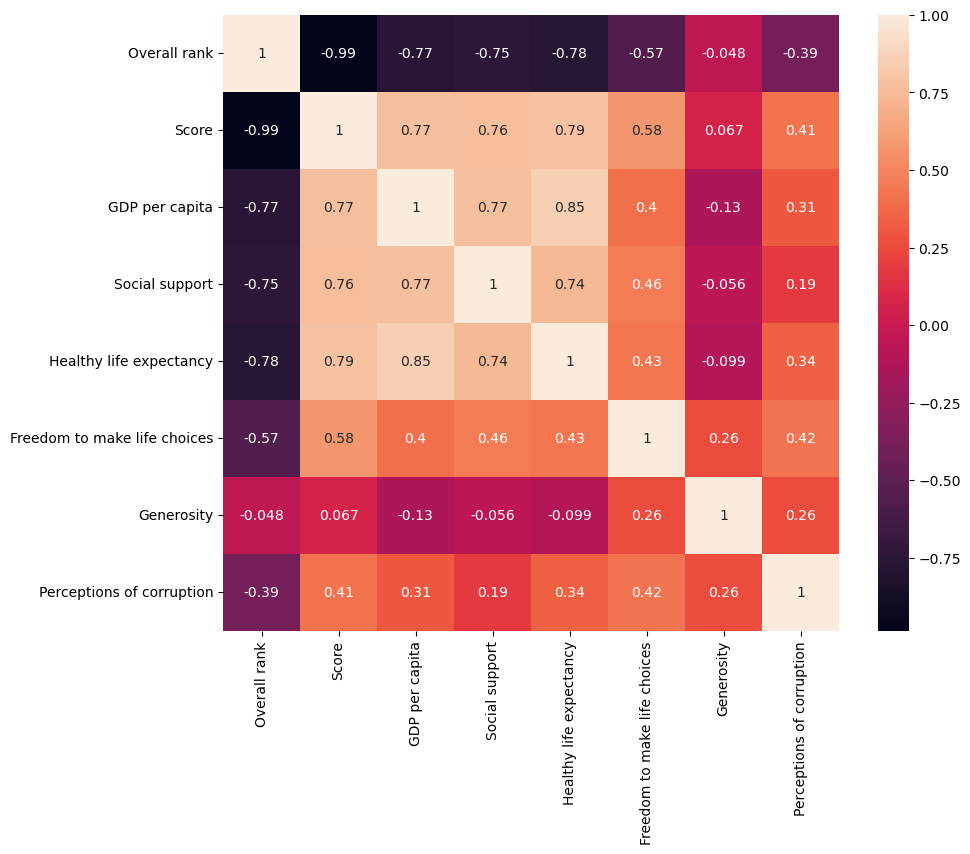

In [53]:
corr_mat = cr_df[num_feat].corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, square= True)

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Score', ylabel='Density'>

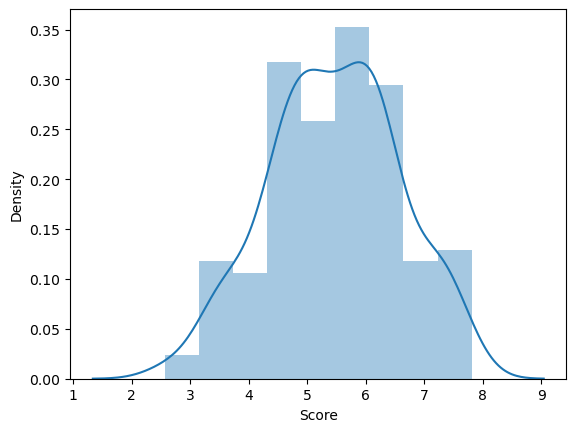

In [54]:
#persebaran data
sns.distplot(cr_df['Score'])

# Feature Enginering

In [61]:
#feature enginering
cr_df= pd.get_dummies(cr_df, drop_first=True)
cr_df

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Benua_Asia,Benua_Europe,Benua_North America,Benua_Oceania,Benua_South America
Negara,,,,,,,,,,,,,
Finland,1,7.809,1.285,1.500,0.961,0.662,0.160,0.478,0,1,0,0,0
Denmark,2,7.646,1.327,1.503,0.979,0.665,0.243,0.495,0,1,0,0,0
Switzerland,3,7.560,1.391,1.472,1.041,0.629,0.269,0.408,0,1,0,0,0
Iceland,4,7.504,1.327,1.548,1.001,0.662,0.362,0.145,0,1,0,0,0
Norway,5,7.488,1.424,1.495,1.008,0.670,0.288,0.434,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central African Republic,149,3.476,0.041,0.000,0.000,0.293,0.254,0.028,0,0,0,0,0
Rwanda,150,3.312,0.343,0.523,0.572,0.604,0.236,0.486,0,0,0,0,0
Zimbabwe,151,3.299,0.426,1.048,0.375,0.377,0.151,0.081,0,0,0,0,0


# Modelling

In [89]:
#Modelling
X = cr_df.drop(['Score', 'Overall rank'], axis=1)
y = cr_df['Score']
y

Negara
Finland                     7.809
Denmark                     7.646
Switzerland                 7.560
Iceland                     7.504
Norway                      7.488
                            ...  
Central African Republic    3.476
Rwanda                      3.312
Zimbabwe                    3.299
South Sudan                 2.817
Afghanistan                 2.567
Name: Score, Length: 146, dtype: float64

In [90]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

In [91]:
model_lr = LinearRegression()
model_rg = RidgeCV(alphas=[1, 0.1, 0.01, 0.005])
model_ls = LassoCV(alphas=[1, 0.1, 0.01, 0.005])
model = {'model_lr' : model_lr , 'model_rg' : model_rg, 'model_ls' : model_ls}

In [92]:
def rmse(model):
    return np.sqrt(- cross_val_score(model, X,y, cv=5, scoring='neg_mean_squared_error'))

In [93]:
for m in model:
    print(m + " =", rmse(model[m]).mean())

model_lr = 0.6490610118309309
model_rg = 0.652214696684981
model_ls = 0.6493866643385866


# check importance feature

In [94]:
coef= pd.Series(model_ls.fit(X,y).coef_, index= X.columns)

<AxesSubplot:>

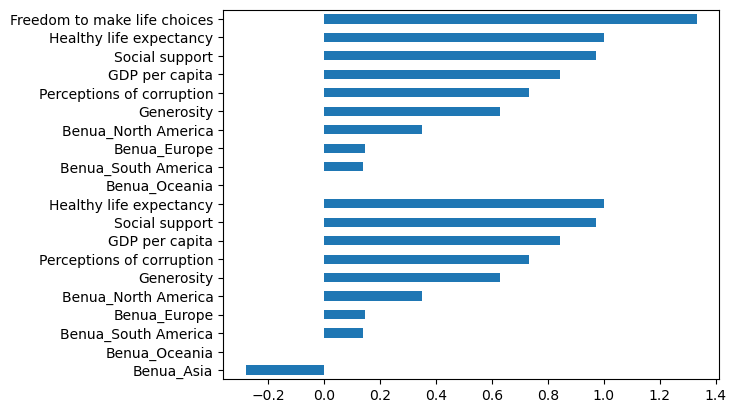

In [95]:
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
imp_coef.plot(kind='barh')

# export model

In [96]:
import pickle
model_ls.fit(X,y)
pickle.dump(model_ls, open('model_ls_Happines_report.pkl', 'wb'))